# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau! 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '../PythonForDA/data/final_project/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [5]:
descr = xl.parse('Fact Summary')

Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [6]:
df = pd.read_excel(path_to_file)

In [7]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх, 
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** 

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql. 

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga. 
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

## Analyzing the data!

**Checking and preparing data!**

In [8]:
# First we look at the size of the dataset.
df.shape

(50447, 32)

The data set is quite large, so it is clearly not advisable to view it all with your eyes. Let's look at a few data records, what they look like

In [9]:
# let's review the description of the available data
df_info = pd.read_excel(path_to_file, 2)
df_info

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [10]:
# Let's see what types of data we have in the columns
df.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

Time Column: The 'Time' column is currently of object data type. If this column represents time values (e.g., HH:MM:SS), it might be more appropriate to convert it to datetime type using pd.to_datetime() method. This would facilitate easier time-based analysis and manipulation.

Mobile Number: Depending on the use case, 'Mobile Number' might not need to be stored as an integer, especially if there's no numerical operation to be performed on it. It might be more appropriate to store it as a string (object) if it's used as an identifier rather than a numerical value.

Membership ID: Similar to 'Mobile Number', if 'Membership ID' is used as an identifier and not subjected to numerical operations, storing it as a string (object) might be more appropriate.

In [12]:
# disable warning messages
warnings.filterwarnings("ignore")

In [13]:
# Check for missing values - the number of missing values in each column
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [14]:
print(df.isnull().sum())

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64


We don't have a missing values

We'll take a look at the Country column to understand the spread of different region.

In [15]:
df['Country'].value_counts()

Country
Singapore      18196
Philippines    12380
Malaysia       10763
Indonesia       9108
Name: count, dtype: int64

We'll take a look at the Category column to understand the spread of differents.

In [16]:
df['Category'].value_counts()

Category
Bakery & Breakfast           6770
Frozen                       6393
Beauty                       5205
Fruit & Vegetable            4370
Pet Care                     3465
Dairy, Chilled & Eggs        3381
Choco, Snacks, Sweets        3019
Kitchen & Dining             2552
Rice & Cooking Essentials    2432
Beverages                    2208
Meat & Seafood               2149
Mother & Baby                2064
Household                    1881
Party Supplies               1836
Wines, Beers & Spirits       1714
Health                       1008
Name: count, dtype: int64

**1. Let`s check which country and category has the biggest amount of profit and sorted our results**

In [17]:
amount_profit = df.groupby(['Country', 'Category'])['Profit Margin'].sum().reset_index()
sorted_result = amount_profit.sort_values(by='Profit Margin', ascending=False) 

# Set display options to show all rows
pd.set_option('display.max_rows', None)
print(sorted_result)
pd.reset_option('display.max_rows')

        Country                   Category  Profit Margin
53    Singapore                     Frozen     3319.41011
49    Singapore                     Beauty     2879.50594
48    Singapore         Bakery & Breakfast     2266.89734
37  Philippines                     Frozen     2120.67818
21     Malaysia                     Frozen     2010.92800
33  Philippines                     Beauty     1897.75151
5     Indonesia                     Frozen     1810.10219
17     Malaysia                     Beauty     1785.27813
54    Singapore          Fruit & Vegetable     1743.73632
61    Singapore                   Pet Care     1634.51296
59    Singapore              Mother & Baby     1566.11888
58    Singapore             Meat & Seafood     1501.51636
32  Philippines         Bakery & Breakfast     1493.31282
1     Indonesia                     Beauty     1427.41745
16     Malaysia         Bakery & Breakfast     1353.53122
63    Singapore     Wines, Beers & Spirits     1252.76286
0     Indonesi

As we can see Frozen category generate the highest profit margin in each country. businesses may consider allocating more resources or marketing efforts towards this category to further enhance profitability.

**2. What city sold the most product items?**

In [18]:
pd.pivot_table(df, values='Profit Margin', index='City', aggfunc='sum')

,Profit Margin
City,
Bedok,14649.59575
Jakarta,11068.59512
Kuala Lumpur,12958.11534
Manila,14455.63346
Woodlands,7489.29808


Bedok and Manila had sold the most count of items

**3. What was the best month for sales?**

In [19]:
monthly_profit = df.groupby('Month')['Profit Margin'].sum()
print(monthly_profit)

Month
1     5266.08744
2     4633.82928
3     4971.89823
4     4575.19229
5     5062.24860
6     4838.02954
7     5217.93125
8     4802.50536
9     4743.11953
10    5157.15819
11    5067.54192
12    6285.69612
Name: Profit Margin, dtype: float64


We can clearly see that month 12 (December) is the highest Profit Margin. So we’re gonna visualizing our results with bar chart.

Text(0.5, 0, 'Month number')

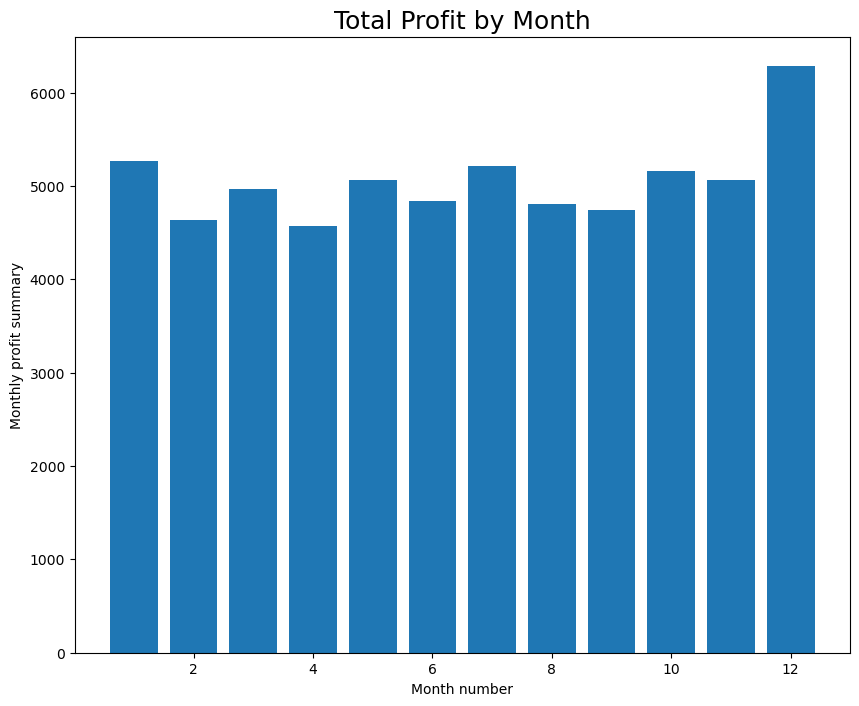

In [20]:
plt.figure(figsize=(10, 8))
months = range(1, 13) # for x axes
plt.bar(months, monthly_profit)
plt.title('Total Profit by Month', fontsize=18)
plt.ylabel('Monthly profit summary')
plt.xlabel('Month number')

**4. Which product gave the most profit?**

In [21]:
# Group the data by 'Items' and calculate the sum of 'Profit Margin' for each item
item_profit_margin_sum = df.groupby('Items')['Profit Margin'].sum()

# Sort the results in descending order based on the sum of 'Profit Margin'
sorted_items = item_profit_margin_sum.sort_values(ascending=False)

# Display the sorted results
print(sorted_items)

Items
Ashai Lager Beer                       1764.15428
Cascadian farm organic strawberries    1094.56347
Alpo Chicken pate dog food              995.04248
Lamb pate dog food                      915.99124
Fresh Soyamilk                          845.88239
                                          ...    
wholewheat toasted bread                  0.20100
Clif Bar cranberry and mango muesli       0.17290
German multigrain roll                    0.15525
F&N chocolate and nut muesli bar          0.14950
raisin brain breakfast cereal             0.12426
Name: Profit Margin, Length: 597, dtype: float64


The sorted results provide insights into the distribution of profitability across different items. It allows businesses to identify high-profit-margin items that contribute significantly to revenue generation.

**5. What Hours had the highest number of sales?**

In [22]:
# Convert 'Time' column to string format (if not already)
df['Time'] = df['Time'].astype(str)

# Convert 'Time' column to datetime data type
df['Time'] = pd.to_datetime(df['Time'])

In [23]:
# Creating a column with hours
df['Hour'] = df['Time'].dt.hour

In [24]:
sales_by_the_hour = df.pivot_table(index=['Hour'], values=['Receipt Number'], aggfunc='count')
display(sales_by_the_hour.style.background_gradient())

,Receipt Number
Hour,
10,4171
11,4022
12,4139
13,4418
14,4043
15,4265
16,4184
17,4036
18,4267


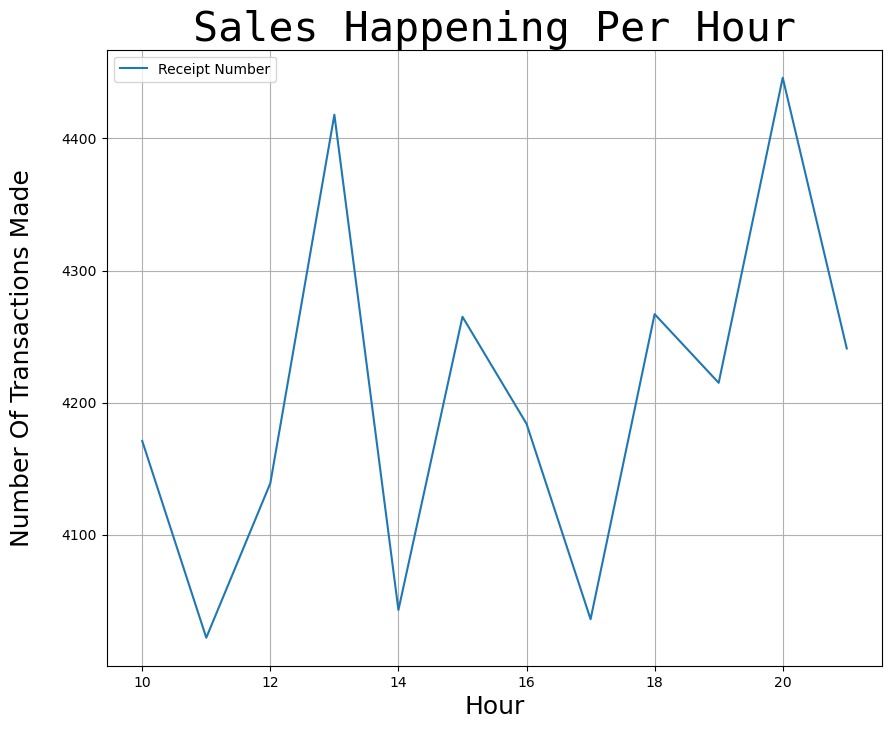

In [25]:
sales_by_the_hour.plot(figsize=(10, 8))  
plt.title('Sales Happening Per Hour', fontdict={'fontname': 'monospace', 'fontsize': 30}) 
plt.ylabel("Number Of Transactions Made", fontsize=18, labelpad=20) 
plt.xlabel("Hour", fontsize=18) 
plt.grid() 
plt.show() 

The highest number of sales is going at lunch time - 1 pm and evening time - 8 pm.

**6. What Sum of Daily Profits% by Country?**

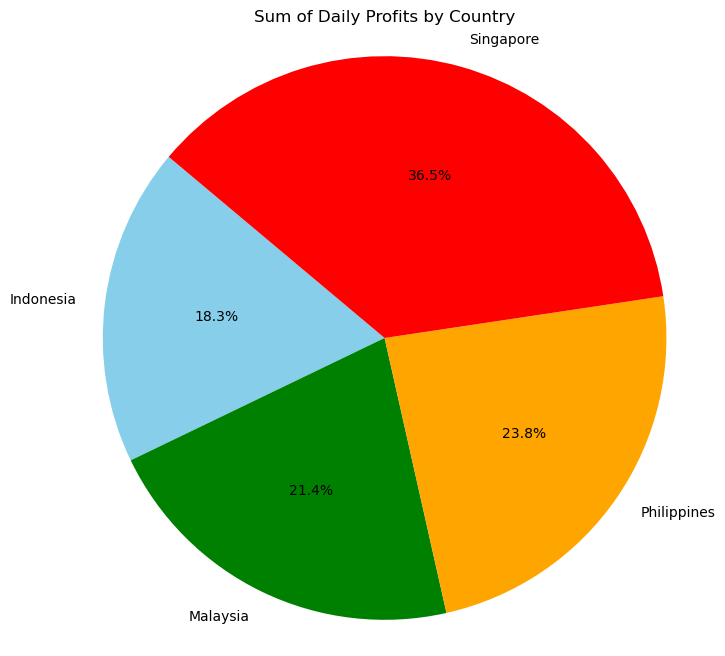

In [26]:
# Group the data by country and calculate the sum of daily profits
grouped_data = df.groupby('Country')['Profit Margin'].sum().reset_index()

# Define colors for each country (you can customize as needed)
colors = ['skyblue', 'green', 'orange', 'red', 'purple']

# Plot pie chart for sum of daily profits by country
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Profit Margin'], labels=grouped_data['Country'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sum of Daily Profits by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The biggest Sum of Daily Profits% in Singapore

**7. Which categories have mean profit margin the highest one and the lowest?**

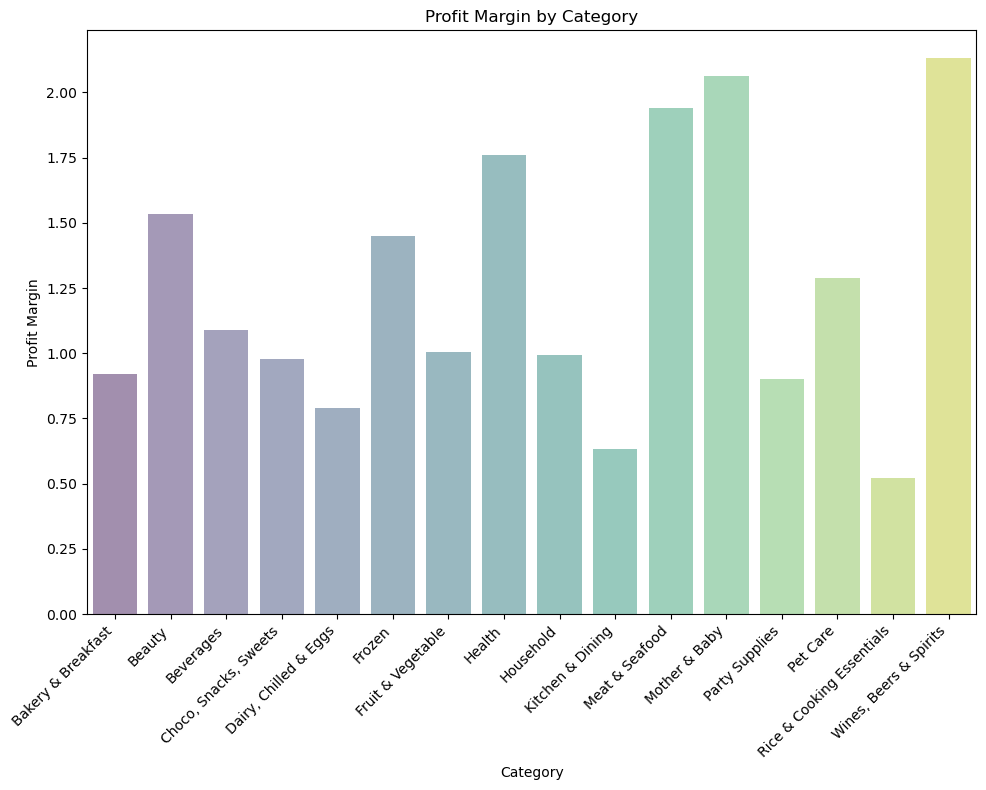

In [27]:
# Group the data by category and calculate the mean profit margin
grouped_data = df.groupby('Category')['Profit Margin'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Category', y='Profit Margin', data=grouped_data, palette='viridis', alpha = 0.5 )

# Add labels and title
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Wines, Beers & Spirits, Mother & Baby, Meat & Seafood categories have higher average profit margins, while  Rice & Cooking Essentials, Kitchen & Dining have lower margins or even operate at a loss.

**8. Is there a dependence between the gender and the category of goods that are being bought?**

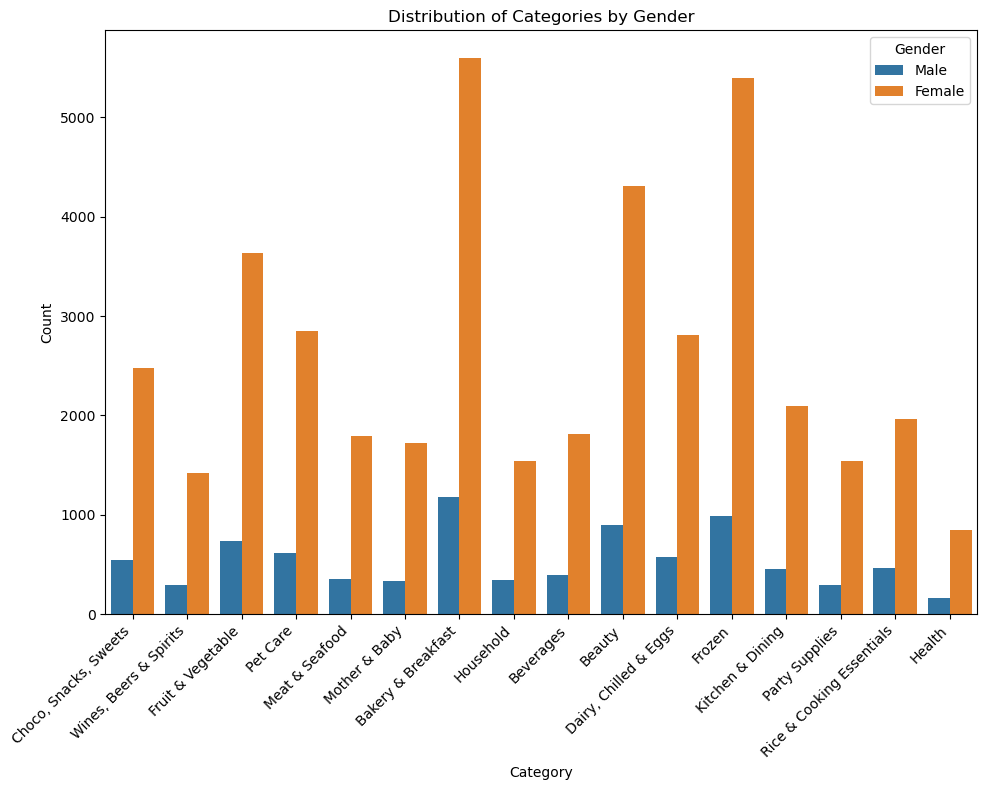

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Category', hue='Gender')

plt.title('Distribution of Categories by Gender')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

We don't have dependence between the gender and the category. But in this visualization, we can see that our target audience is women, men make purchases much less often

**9. Is there a relationship between Price' and 'Profit Margin?**

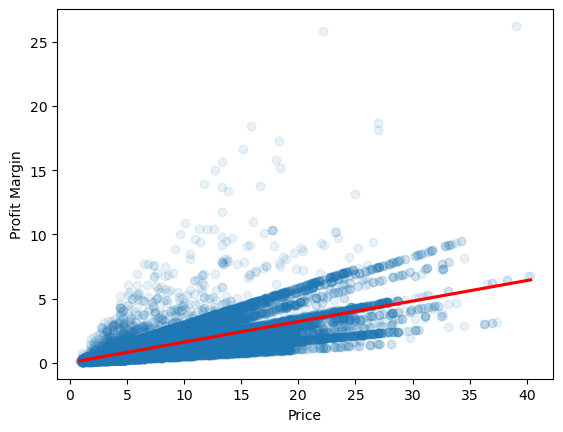

In [29]:
sns.regplot(x='Price', y='Profit Margin', data=df, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});

In this case, if the angle of inclination of the line relative to the horizontal is about 30 degrees, this may indicate that the increase in Price leads to a moderate increase in Profit Margin.

Strength of the relationship: However, the slope of the trend line is not the only indicator of the strength of the relationship between variables. To assess the strength of the relationship, one should also pay attention to the correlation coefficient (eg, Pearson's correlation) that can be calculated for these variables.

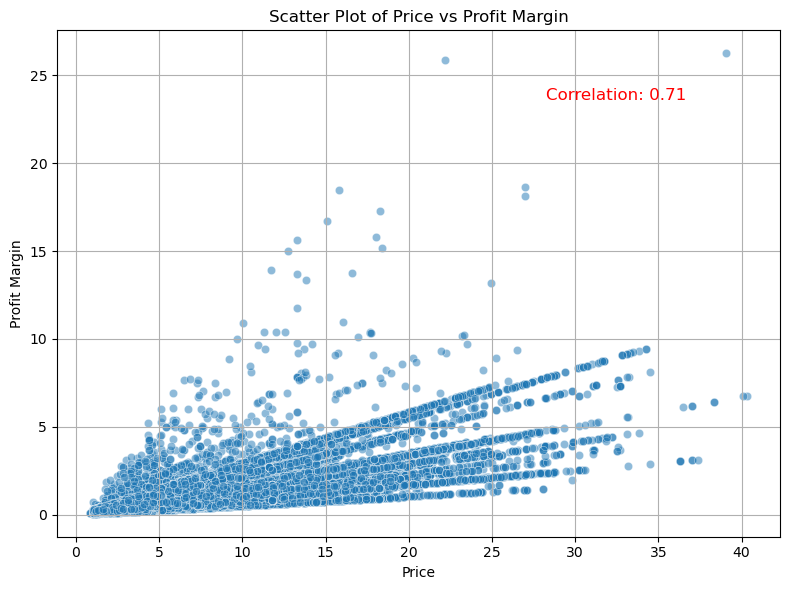

In [30]:
# Calculation of Pearson's correlation
correlation = df['Price'].corr(df['Profit Margin'])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Profit Margin', data=df, alpha=0.5)
plt.title('Scatter Plot of Price vs Profit Margin')
plt.xlabel('Price')
plt.ylabel('Profit Margin')

# Adding text with correlation value
plt.text(x=df['Price'].max() * 0.7, y=df['Profit Margin'].max() * 0.9,
         s=f'Correlation: {correlation:.2f}', fontsize=12, color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

The correlation coefficient of 0.71 indicates a fairly strong positive linear relationship between the two variables.

**10. What is the average number of items in each receipt?**

In [31]:
# We group the data by receipt number and calculate the average number of goods in each group
average_items_per_receipt = df.groupby('Receipt Number')['QTY'].mean()

# Output the result
print("Average number of products in each receipt:", average_items_per_receipt.mean())


Average number of products in each receipt: 1.5502857082074204


**11. Which banks are most often used to pay for purchases?**

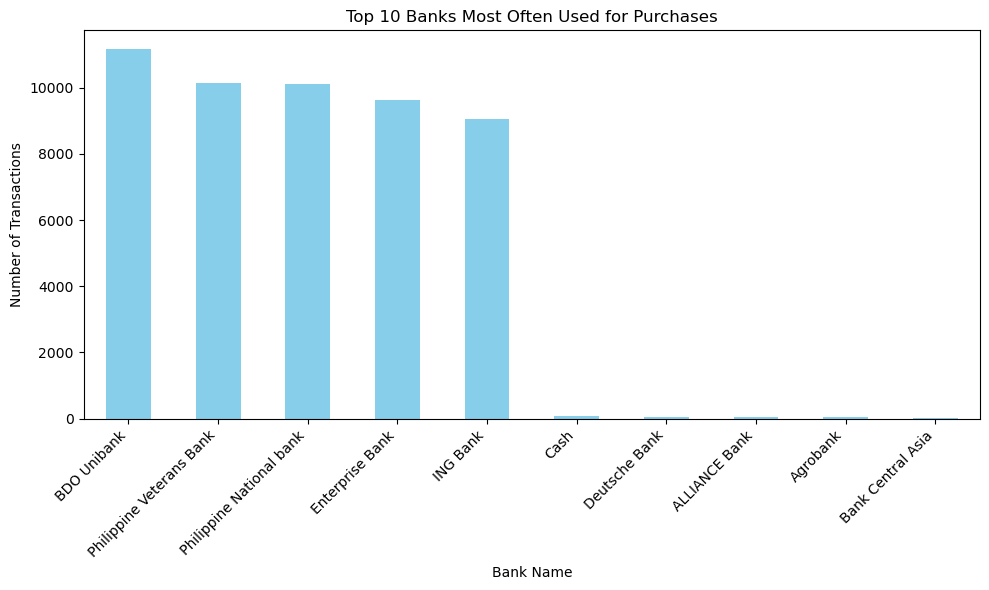

In [32]:
# Count the number of transactions for each bank
bank_counts = df['Bank Name'].value_counts().head(10)  # Consider only the top 10 banks

# Create a bar plot
plt.figure(figsize=(10, 6))
bank_counts.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.title('Top 10 Banks Most Often Used for Purchases')
plt.xlabel('Bank Name')
plt.ylabel('Number of Transactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


**12.The difference in spending between men and women. Test: Regression analysis to determine the relationship between the age of buyers and the amount of their purchases.**

In [33]:
from scipy.stats import ttest_ind

# Suppose your DataFrame is named df and contains data on spending and gender

# Split the data into two groups by gender
male_spending = df[df['Gender'] == 'Male']['Price']
female_spending = df[df['Gender'] == 'Female']['Price']

# Calculate the mean spending for each group
male_mean_spending = male_spending.mean()
female_mean_spending = female_spending.mean()

# Use the Student's t-test to compare the mean spending between males and females
t_statistic, p_value = ttest_ind(male_spending, female_spending)

# Print the results of the test
print("Mean spending for males:", male_mean_spending)
print("Mean spending for females:", female_mean_spending)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# You can use the p-value to determine the statistical significance of the difference between the groups
if p_value < 0.05:
    print("There are statistically significant differences in spending between males and females.")
else:
    print("There are no statistically significant differences in spending between males and females.")

Mean spending for males: 7.33448811594203
Mean spending for females: 7.442682081201281
t-statistic: -1.9246750726025204
p-value: 0.05427563824187569
There are no statistically significant differences in spending between males and females.


***Visualization in the form of an interactive data report can be found at the link:*** https://public.tableau.com/shared/7ZBC6D22X?:display_count=n&:origin=viz_share_link